In [1]:
import os
if not os.path.exists('common.py'):
    print('trying to find project root directory by chaning to parent directory')
    os.chdir('..')
if os.path.exists('common.py'):
    print('all good')
else:
    print('could not find project root directory')

trying to find project root directory by chaning to parent directory
all good


In [2]:
import pandas as pd
import numpy as np
import os

import data
from common import OUTPUTPATH
from modules.experiments import KFold, GroupKFoldSpecial
STATE = np.random.RandomState(seed=1000)

In [3]:
interpolation = pd.read_csv(os.path.join(OUTPUTPATH, 'no_assemble_interpolation.csv'))
interpolation = interpolation.set_index('Unnamed: 0')
interpolation.index.name = None
interpolation


,mean_train_hamming loss,std_train_hamming loss,mean_test_hamming loss,std_test_hamming loss,mean_train_error,std_train_error,mean_test_error,std_test_error,mean_train_log loss,std_train_log loss,mean_test_log loss,std_test_log loss
Lr,0.183269,0.007191,0.201535,0.049730,0.474907,0.028398,0.513421,0.131641,2.073205,0.085173,2.159589,0.388495
GAM,0.038438,0.003724,0.085000,0.043192,0.127604,0.012400,0.264649,0.121913,0.631576,0.040820,1.278009,0.602032
RuFit,0.010961,0.002383,0.063092,0.037165,0.035087,0.007635,0.182281,0.093626,0.267426,0.028055,0.989179,0.660852
RF,0.000227,0.000390,0.060439,0.035364,0.000483,0.000815,0.192632,0.098014,0.237679,0.004404,1.038604,0.709325


In [4]:
extrapolation = pd.read_csv(os.path.join(OUTPUTPATH, 'no_assemble_extrapolation.csv'))
extrapolation = extrapolation.set_index('Unnamed: 0')
extrapolation.index.name = None
extrapolation

,mean_train_hamming loss,std_train_hamming loss,mean_test_hamming loss,std_test_hamming loss,mean_train_error,std_train_error,mean_test_error,std_test_error,mean_train_log loss,std_train_log loss,mean_test_log loss,std_test_log loss
Lr_pcc,0.183836,0.008626,0.183400,0.178331,0.479947,0.029754,0.499150,0.454198,2.088094,0.096015,2.670335,1.991078
GAM_pcc,0.039552,0.002979,0.134332,0.174609,0.130201,0.009977,0.327829,0.397306,0.625013,0.044157,2.668734,3.636575
RuFit_pcc,0.010858,0.002180,0.162652,0.202399,0.034836,0.005773,0.353297,0.414054,0.263414,0.022423,2.316536,3.425546
RF_pcc,0.000094,0.000277,0.112563,0.184935,0.000188,0.000553,0.236691,0.367998,0.233382,0.003507,1.504354,1.727774


In [4]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt


def plot_summary(metric, summ, num_reps=30, baseline=None, names=None, colors = list(mcolors.BASE_COLORS.keys())):
    width = 0.35
    ind = np.arange(len(summ))
    plt.bar(ind-width/2, summ[f'mean_train_{metric}'], width=width, label='train', 
            yerr=summ[f'std_train_{metric}']/num_reps**0.5, capsize=3.0)
    plt.bar(ind+width/2, summ[f'mean_test_{metric}'], width=width, label='test',
            yerr=summ[f'std_test_{metric}']/num_reps**0.5, capsize=3.0)
    if baseline:
        for i in range(len(baseline)):
            plt.axhline(y=baseline[i], color=colors[i], linestyle='-', label=names[i])
    plt.ylabel(metric)
    plt.legend()
    plt.xticks(ind, summ.index)

In [5]:
def get_full_loss(_train, _test):
    """This is calculate realistic full phase error
    """
    train_uniq, train_cnt = np.unique(data.y[data.y.index.isin(_train)].values, return_counts=True, axis=0)
    _select = train_uniq[list(train_cnt).index(max(train_cnt))]
    
    test_uniq, test_cnt = np.unique(data.y[data.y.index.isin(_test)], return_counts=True, axis=0)
    acc_cnt = 0
    for i in range(len(test_uniq)):
        if (test_uniq[i] == _select).all():
            acc_cnt += test_cnt[i]
    return 1-acc_cnt/sum(test_cnt)

def get_hamming_loss(_train, _test, name):
    """This is calculate realistic hamming loss
    """
    train_uniq, train_cnt = np.unique(data.y[name][data.y[name].index.isin(_train)].values, return_counts=True, axis=0)    
    test_uniq, test_cnt = np.unique(data.y[name][data.y[name].index.isin(_test)], return_counts=True, axis=0)
    _select = train_uniq[list(train_cnt).index(max(train_cnt))]

    acc_cnt = 0
    for i in range(len(test_uniq)):
        if test_uniq[i] == _select:
            acc_cnt += test_cnt[i]
    return 1-acc_cnt/sum(test_cnt)

Below is interpolation unreal and uniformed full phase loss

In [6]:
# interpolation full phase
uniq, cnts = np.unique(data.y.values, return_counts=True, axis=0)
unreal_inter_full_info_error = 1 - max(cnts)/sum(cnts)
inter_full_uninfo_error = 1 - (1/2)**4
print('Interpolation full sphase error base line:\nUnreal inform error:{} \nUninform error:{}'.format(unreal_inter_full_info_error, inter_full_uninfo_error))


Interpolation full sphase error base line:
Unreal inform error:0.5761821366024518 
Uninform error:0.9375


Below is interpolation unreal and uniformed hamming loss

In [7]:
# interpolation hamming loss
unreal_inter_hamming_loss = []
for each in [data.sphere, data.vesicle, data.worm, data.other]:
    uniq, cnt = np.unique(each, return_counts=True)
    error = 1 - max(cnt)/sum(cnt)
    unreal_inter_hamming_loss.append(error)
unreal_inter_hamming_loss = np.mean(unreal_inter_hamming_loss)
inter_uninfo_hamming_loss = np.mean([0.5, 0.5, 0.5, 0.5])

print('Interpolation average sphases error base line:\nUnreal inform error:{} \nUninform error:{}'.format(unreal_inter_hamming_loss, inter_uninfo_hamming_loss))


Interpolation average sphases error base line:
Unreal inform error:0.2806479859894921 
Uninform error:0.5


Below is extrapolation unreal and uniformed full phase loss

In [8]:
# extrapolation full phase loss
unreal_extra_full_info_error = []
cnt =0
for train, test in GroupKFoldSpecial(len(set(data.comp_ids)), size=20).split(data.x1, data.y, data.comp_ids):
    unreal_extra_full_info_error.append(get_full_loss(train, test))
unreal_extra_full_info_error = np.mean(unreal_extra_full_info_error)
unreal_extra_full_info_error
print('Extrapolation full sphase error base line:\nUnreal inform error:{}'.format(unreal_extra_full_info_error))


Extrapolation full sphase error base line:
Unreal inform error:0.5026709401709402


Below is extrapolation unreal and uniformed hamming loss

In [9]:
# extrapolation hamming loss
unreal_extra_hamming_loss = []
for train, test in GroupKFoldSpecial(len(set(data.comp_ids)), size=20).split(data.x1, data.y, data.comp_ids):
    for each in [data.sphere, data.vesicle, data.worm, data.other]:
        unreal_extra_hamming_loss.append(get_hamming_loss(data.y.index.tolist(), test, each.name))
unreal_extra_hamming_loss = np.mean(unreal_extra_hamming_loss)
print('Interpolation average sphases error base line:\nUnreal inform error:{}'.format(unreal_extra_hamming_loss))

Interpolation average sphases error base line:
Unreal inform error:0.24853395061728398


Negative loglikelihood

In [10]:
import math

def neglikehood(p, y):
    result = (-math.log2(p)*y - (1-y)*math.log2(1-p))
    return (result)

def get_full_logs(_train, _test):
    train_uniq, train_cnt = np.unique(data.y[data.y.index.isin(_train)].values, return_counts=True, axis=0)
    train_uniq = [list(each) for each in train_uniq]
    train_prob = train_cnt/sum(train_cnt)
    
    test_uniq, test_cnt = np.unique(data.y[data.y.index.isin(_test)], return_counts=True, axis=0)
    test_uniq = [list(each) for each in test_uniq]
    logs = 0
    for i in range(len(test_uniq)):
        try:
            indx = train_uniq.index(test_uniq[i])
            logs += -1* test_cnt[i] * math.log2(train_prob[indx])
        except:
            pass
    return logs/sum(test_cnt)

def get_hamming_logs(_train, _test, name):
    train_uniq, train_cnt = np.unique(data.y[name][data.y[name].index.isin(_train)].values, return_counts=True, axis=0)
    train_uniq = train_uniq.tolist()
    train_prob = train_cnt/sum(train_cnt)
    
    test_uniq, test_cnt = np.unique(data.y[name][data.y[name].index.isin(_test)], return_counts=True, axis=0)
    test_uniq = test_uniq.tolist()
    
    logs = 0
    for i in range(len(test_uniq)):
        try:
            indx = train_uniq.index(test_uniq[i])
            logs += -1* test_cnt[i] * math.log2(train_prob[indx])
        except:
            pass
    return logs/sum(test_cnt)

In [11]:
# unrealistic interpolation
uniq, cnt = np.unique(data.y.values, axis=0, return_counts=True)
prob = cnt/sum(cnt)

unreal_inter_full_info_loss = 0
for each in cnt:
    unreal_inter_full_info_loss += -each * math.log2(each/sum(cnt))
unreal_inter_full_info_loss = unreal_inter_full_info_loss/sum(cnt)
print("Interpolation full phase logloss base line:\n Unreal Inform error: ", unreal_inter_full_info_loss)

Interpolation full phase logloss base line:
 Unreal Inform error:  2.3860728197730245


In [12]:
# interpolation average sphase informed
unreal_inter_avg_info_loss = []
for each in [data.sphere, data.vesicle, data.worm, data.other]:
    uniq, cnt = np.unique(each, return_counts=True)
    prob = max(cnt)/sum(cnt) if uniq[list(cnt).index(max(cnt))] else 1- max(cnt)/sum(cnt)
    
    for indx in range(len(each)):
        unreal_inter_avg_info_loss.append(neglikehood(prob, each[indx]))
unreal_inter_avg_info_loss = np.mean(unreal_inter_avg_info_loss)
print('Interpolation average morphology logloss base line:\nUnreal Inform logloss:{}'.format(unreal_inter_avg_info_loss))


Interpolation average morphology logloss base line:
Unreal Inform logloss:0.7462898274008147


In [13]:
real_extra_full_info_loss = []
for train, test in GroupKFoldSpecial(len(set(data.comp_ids)), size=20).split(data.x1, data.y, data.comp_ids):
    real_extra_full_info_loss.append(get_full_logs(train, test))
real_extra_full_info_loss = np.mean(real_extra_full_info_loss)

extra_full_uninfo_loss = -math.log2(0.5**4)

print('Extrapolation full sphase error base line:\nReal Inform logloss:{} \nUninform logloss:{}'.format(real_extra_full_info_loss, extra_full_uninfo_loss))

Extrapolation full sphase error base line:
Real Inform logloss:2.4879044454190025 
Uninform logloss:4.0


In [14]:
unreal_extra_avg_info_loss = []
for each in [data.sphere, data.vesicle, data.worm, data.other]:
    uniq, cnt = np.unique(each, return_counts=True)
    prob = max(cnt)/sum(cnt) if uniq[list(cnt).index(max(cnt))] else 1- max(cnt)/sum(cnt)
    
    for indx in range(len(each)):
        unreal_extra_avg_info_loss.append(neglikehood(prob, each[indx]))
unreal_extra_avg_info_loss = np.mean(unreal_extra_avg_info_loss)
print('Extrapolation average sphase error base line:\nReal Inform logloss:{}'.format(unreal_extra_avg_info_loss))

Extrapolation average sphase error base line:
Real Inform logloss:0.7462898274008147


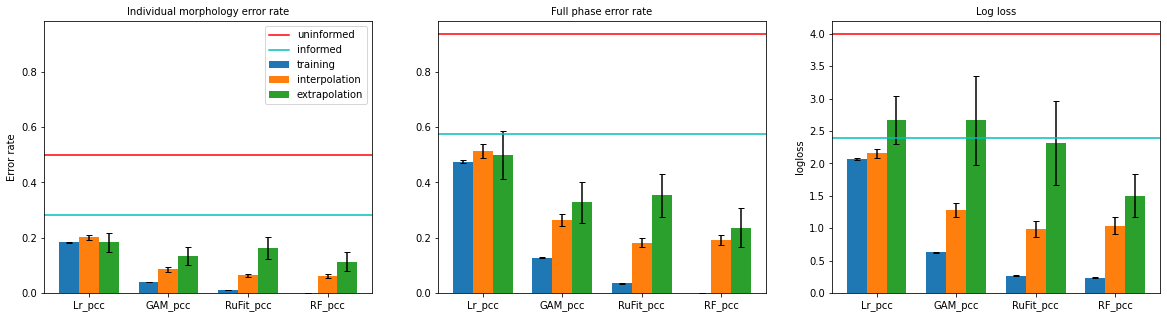

In [17]:
colors = ['r', 'c', 'm', 'y', 'b']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, sharex=True, figsize=(20, 5))

width = 0.25
fontsize = 10
ind = np.arange(len(interpolation))

ax1.bar(ind-width, interpolation[f'mean_train_hamming loss'], width=width, label='training', 
        yerr=interpolation[f'std_train_hamming loss']/30**0.5, capsize=3.0)
ax1.bar(ind, interpolation[f'mean_test_hamming loss'], width=width, label='interpolation',
        yerr=interpolation[f'std_test_hamming loss']/30**0.5, capsize=3.0)
ax1.bar(ind+width, extrapolation[f'mean_test_hamming loss'], width=width, label='extrapolation',
        yerr=extrapolation[f'std_test_hamming loss']/28**0.5, capsize=3.0)

ax1.set_title('Individual morphology error rate', fontsize=fontsize)
ax1.set_xticks(ind)
ax1.set_ylabel('Error rate', fontsize=fontsize)
ax1.set_xticklabels(interpolation.index, fontsize=fontsize)

# add base line
avg_error_base = [inter_uninfo_hamming_loss, unreal_inter_hamming_loss]
avg_error_name = ['uninformed', 'informed']
for i in range(len(avg_error_base)):
    ax1.axhline(y=avg_error_base[i], color=colors[i], linestyle='-', label=avg_error_name[i])

ax1.legend(fontsize=fontsize)
ax1.sharey(ax2) ########### here to share the y axis

ax2.bar(ind-width, interpolation[f'mean_train_error'], width=width, label='training', 
        yerr=interpolation[f'std_train_error']/30**0.5, capsize=3.0)
ax2.bar(ind, interpolation[f'mean_test_error'], width=width, label='interpolation',
        yerr=interpolation[f'std_test_error']/30**0.5, capsize=3.0)
ax2.bar(ind+width, extrapolation[f'mean_test_error'], width=width, label='extrapolation',
        yerr=extrapolation[f'std_test_error']/28**0.5, capsize=3.0)

# add base line
inter_error_base = [inter_full_uninfo_error, unreal_inter_full_info_error]
inter_error_name = ['uninformed', 'informed']
for i in range(len(inter_error_base)):
    ax2.axhline(y=inter_error_base[i], color=colors[i], linestyle='-', label=inter_error_name[i])

ax2.set_title('Full phase error rate', fontsize=fontsize)
ax2.set_xticks(ind)
ax2.set_xticklabels(extrapolation.index, fontsize=fontsize)
ax2.sharey(ax1) ########### here to share the y axis


ax3.bar(ind-width, interpolation[f'mean_train_log loss'], width=width, label='training', 
        yerr=interpolation[f'std_train_log loss']/30**0.5, capsize=3.0)
ax3.bar(ind, interpolation[f'mean_test_log loss'], width=width, label='interpolation',
        yerr=interpolation[f'std_test_log loss']/30**0.5, capsize=3.0)
ax3.bar(ind+width, extrapolation[f'mean_test_log loss'], width=width, label='extrapolation',
        yerr=extrapolation[f'std_test_log loss']/28**0.5, capsize=3.0)

full_loss_base = [4, unreal_inter_full_info_loss]
full_loss_name = ['uninformed', 'informed']
for i in range(len(full_loss_base)):
    ax3.axhline(y=full_loss_base[i], color=colors[i], linestyle='-', label=full_loss_name[i])

ax3.set_title('Log loss', fontsize=fontsize)
ax3.set_xticks(ind)
ax3.set_xticklabels(extrapolation.index, fontsize=fontsize)
ax3.set_ylabel('logloss', fontsize=fontsize)
plt.savefig(os.path.join(OUTPUTPATH, 'no_assemble_overall_performance.pdf'), bbox_inches='tight', pad_inches=0)

plt.show()

corona_GMA, core_HEMA has no morphology